# Вариант 11
## Егоров Алексей БПМ214

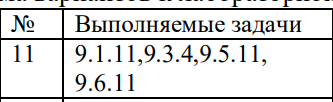

### 9.1.11

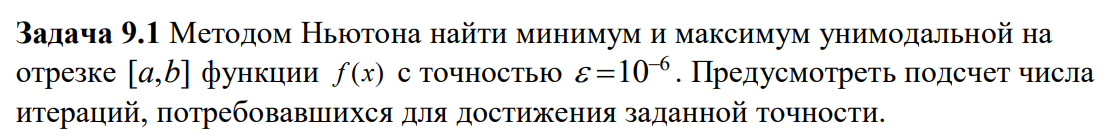

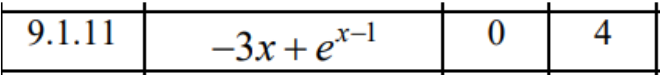

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [371]:
a, b = 0, 4
x = sym.symbols('x')
f = -3*x + sym.exp(x-1)

Text(0, 0.5, 'y')

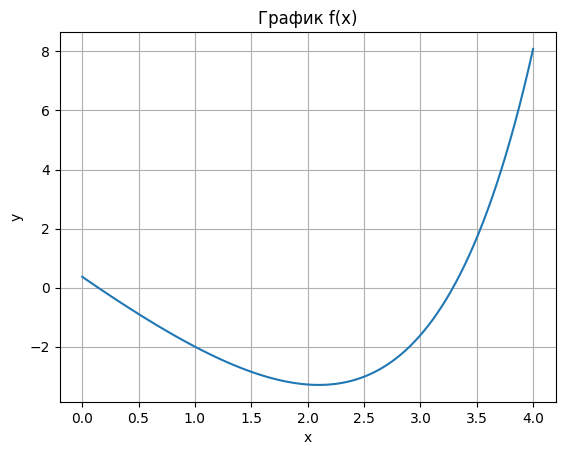

In [376]:
xs = np.linspace(a, b, 100)
ys = [float(f.subs({x : el})) for el in xs]
plt.plot(xs, ys)
plt.title('График f(x)')
plt.xlabel('x')
plt.grid()
plt.ylabel('y')

In [373]:
def newtone_method(f, var, s, x0, eps=1e-6, max_iter=1000):
    a, b = np.min(s), np.max(s)
    if x0 > b or x0 < a:
        print('Точка начального приближения вне отрезка')
        return None
    
    df = sym.diff(f, var, 1)
    ddf = sym.diff(f, var, 2)
    x1 = x0 - float(df.evalf(subs={var: x0})) / float(ddf.evalf(subs={var: x0}))
    iter_num = 1
    while abs(x1 - x0) >= eps:
        x0 = x1
        x1 -= float(df.evalf(subs={var: x1})) / float(ddf.evalf(subs={var: x1}))
        iter_num +=1
        if iter_num > max_iter:
            print('Превышено допустимое количество итераций')
            return None
    if x1 > a and x1 > b:
        x_max = x1
        x_min = min(a, b)
    else:
        x_min = x1
        x_max = max(a, b)
    return {'min': x_min,'max': x_max,'iters': iter_num}

In [374]:
res = newtone_method(f, x, [a, b], (a+b)/2)
print(f"Точка минимума: {res['min']}\tТочка максимума: {res['max']}")
print(f"Количество итераций алгоритма: {res['iters']}")

Точка минимума: 2.0986122886681096	Точка максимума: 4
Количество итераций алгоритма: 4


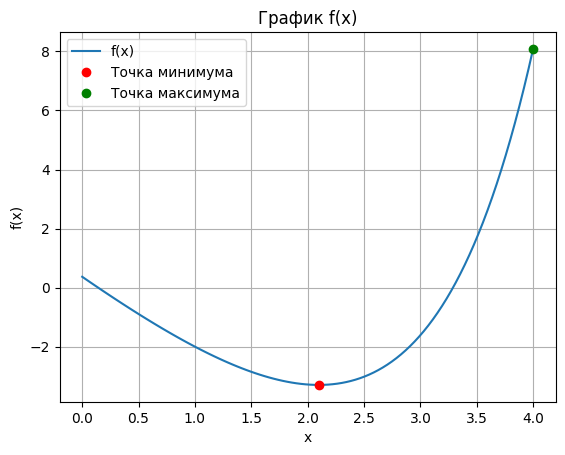

In [375]:
xs = np.linspace(a, b, 100)
ys = [float(f.subs({x: el})) for el in xs]
plt.plot(xs, ys, label='f(x)')
plt.plot(res['min'], float(f.subs({x:res['min']})), 'ro', label='Точка минимума')
plt.plot(res['max'], float(f.subs({x:res['max']})), 'go', label='Точка максимума')
plt.title('График f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()

### 9.3.4

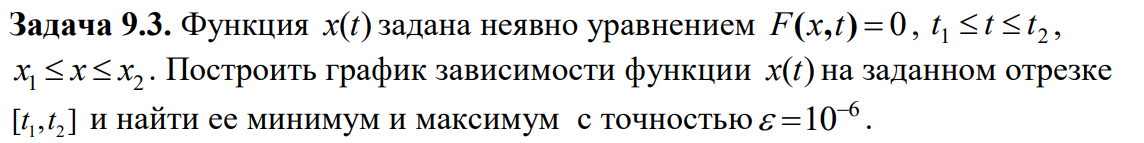

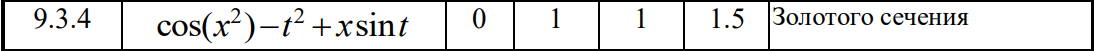

In [330]:
from scipy.optimize import fsolve

In [344]:
x, t = sym.symbols('x t')
def F(x, t):
    return sym.cos(x ** 2) - t ** 2 + x * sym.sin(t)

In [352]:
xs = []
for dt in ts:
    F_lambdified = sym.lambdify(x, F(x, dt), "numpy")
    xs.append(fsolve(F_lambdified, 1.25)[0])

Text(0, 0.5, 'x(t)')

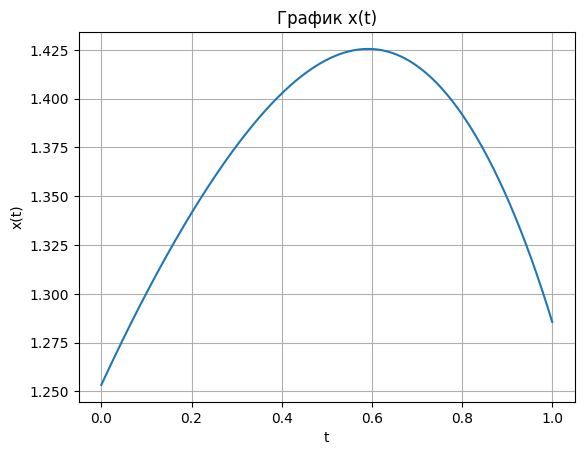

In [353]:
plt.plot(ts, xs)
plt.title('График x(t)')
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')

In [351]:
t1, t2 = 0, 1
x1, x2 = 1, 1.5
ts = np.linspace(t1, t2, 500)

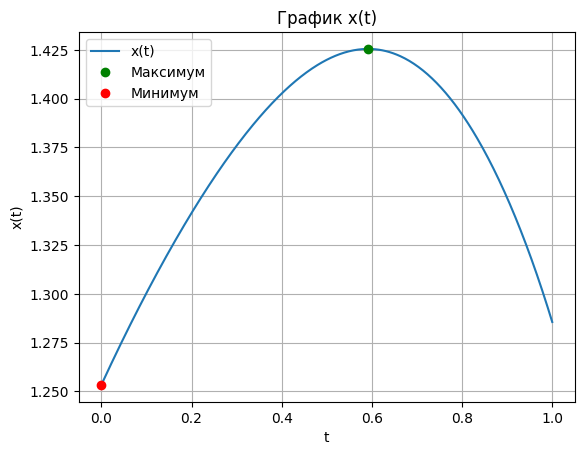

In [369]:
res_max = golden_section_max(F, t1, t2, x1, x2)
res_min = golden_section_min(F, t1, t2, x1, x2)
plt.plot(ts, xs, label='x(t)')
plt.plot(res_max, fsolve(sym.lambdify(x, F(x, res_max), "numpy"), (x1 + x2)/2)[0], 'go', label='Максимум')
plt.plot(res_min, fsolve(sym.lambdify(x, F(x, res_min), "numpy"), (x1 + x2)/2)[0], 'ro', label='Минимум')
plt.title('График x(t)')
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.legend()

In [365]:
def golden_section_max(f, t1, t2, x1, x2, eps=1e-6):
    gr = (np.sqrt(5) - 1) / 2
    a, b = t1, t2
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    while abs(c - d) > eps:
        F_lambdified_c = sym.lambdify(x, F(x, c), "numpy")
        xc = fsolve(F_lambdified_c, (x1 + x2)/2)[0]
        F_lambdified_d = sym.lambdify(x, F(x, d), "numpy")
        xd = fsolve(F_lambdified_d, (x1 + x2)/2)[0]
        if xc > xd:
            b = d
        else:
            a = c
        c = b - gr * (b - a)
        d = a + gr * (b - a)
    return (b + a) / 2

def golden_section_min(f, t1, t2, x1, x2, eps=1e-6):
    gr = (np.sqrt(5) - 1) / 2
    a, b = t1, t2
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    while abs(c - d) > eps:
        F_lambdified_c = sym.lambdify(x, F(x, c), "numpy")
        xc = fsolve(F_lambdified_c, (x1 + x2)/2)[0]
        F_lambdified_d = sym.lambdify(x, F(x, d), "numpy")
        xd = fsolve(F_lambdified_d, (x1 + x2)/2)[0]
        if xc < xd:
            b = d
        else:
            a = c
        c = b - gr * (b - a)
        d = a + gr * (b - a)
    return (b + a) / 2


### 9.5.11

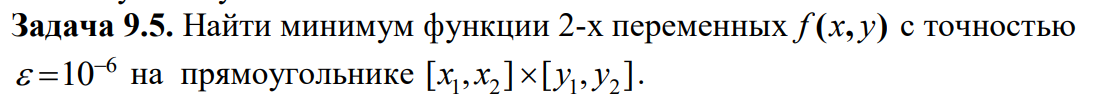

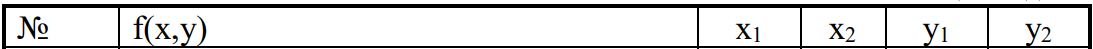

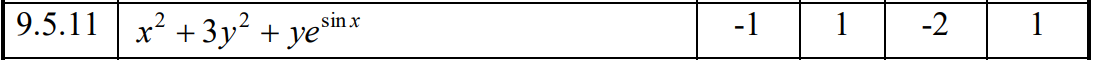

In [410]:
def f(xy):
    x, y = xy
    return x**2 + 3*y**2 + y*np.exp(np.sin(x))

In [411]:
from scipy import optimize

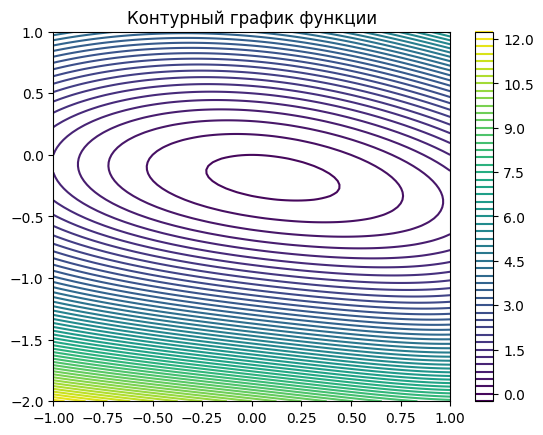

In [412]:
x1, x2 = -1, 1
y1, y2 = -2, 1

x_vals = np.linspace(x1, x2, 100)
y_vals = np.linspace(y1, y2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surface_plot = ax.plot_surface(Y, X, Z, cmap='cool')

plt.title('Трехмерный график функции')
plt.xlabel('Y')
plt.ylabel('X')
plt.show()
contour_plot = plt.contour(X, Y, Z, levels=50)
plt.colorbar(contour_plot)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.title('Контурный график функции')
plt.show()

In [386]:
x0y0 = [0, 0]
res = optimize.minimize(f, x0y0, tol=1e-6)
print(f'Точка минимума: [{res.x[0]}, {res.x[1]}]\tминимум f(x, y) = {f(res.x)}')

Точка минимума: [0.10153530148730935, -0.18444603072807395]	минимум f(x, y) = -0.09175156366743542


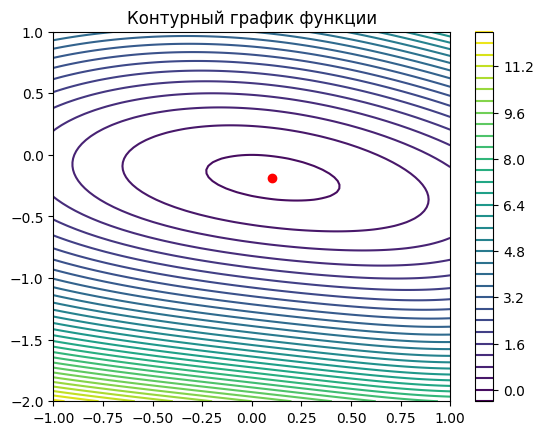

In [400]:
contour_plot = plt.contour(X, Y, Z, levels=30)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.colorbar(contour_plot)
plt.plot(res.x[0], res.x[1], 'ro')
plt.title('Контурный график функции')
plt.show()

### 9.6.11

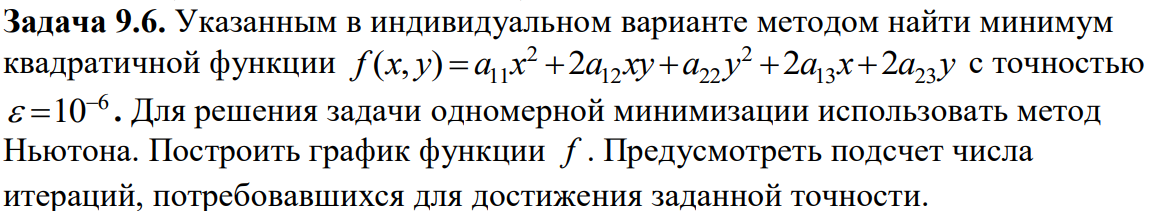

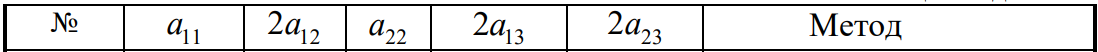

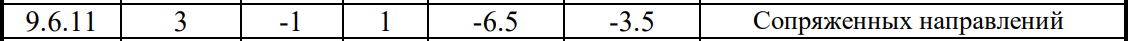

In [401]:
x, y = sym.symbols('x y')
a11, a12_2, a22, a13_2, a23_2 = 3, -1, 1, -6.5, -3.5
f = a11 * x**2 + a12_2 * x * y + a22 * y**2 + a13_2 * x + a23_2 * y

In [402]:
def conjugate_directions(f, x0, eps=1e-6, max_iter = 1000):
    
    H = np.array([[float(sym.diff(f, x, 2)), float(sym.diff(sym.diff(f, x, 1), y, 1))],
         [float(sym.diff(sym.diff(f, x, 1), y, 1)), float(sym.diff(f, y, 2))]])

    alpha = sym.Symbol('alpha')
    p = np.array([1, 0])
    alpha_ = newtone_method(f.subs({x:x0[0] + alpha*p[0], y:x0[1] + alpha*p[1]}), alpha, [-10, 10], 1, eps, max_iter)['min']
    x1 = x0+p*alpha_
    iter_num1 = 0
    while np.linalg.norm(x1 - x0) >= eps:
        if iter_num1 > max_iter:
            print('Превышено допустимое количество итераций')
            return None
        x0 = x1.copy()
        p = np.array([1, -np.dot(p, H)[0]/np.dot(p, H)[1]])
        alpha_ = newtone_method(f.subs({x:x0[0] + alpha*p[0], y:x0[1] + alpha*p[1]}), alpha, [-10, 10], 1, eps, max_iter)['min']
        x1 = x0+p*alpha_
        iter_num1 += 1

    return {'min': x1, 'iters': iter_num1}

In [403]:
res = conjugate_directions(f, [1, 2])
print(f"Точка минимума: {res['min']}")
print(f"Число итераций: {res['iters']}")

Точка минимума: [1.5 2.5]
Число итераций: 2


In [404]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.5, 'Y')

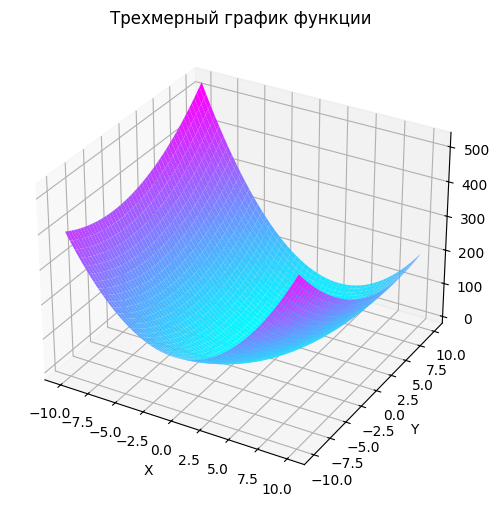

In [408]:
f_lambdified = sym.lambdify((x, y), f, "numpy")

xs = np.linspace(-10, 10, 400)
ys = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(xs, ys)

Z = f_lambdified(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surface_plot = ax.plot_surface(X, Y, Z, cmap='cool')

plt.title('Трехмерный график функции')
plt.xlabel('X')
plt.ylabel('Y')

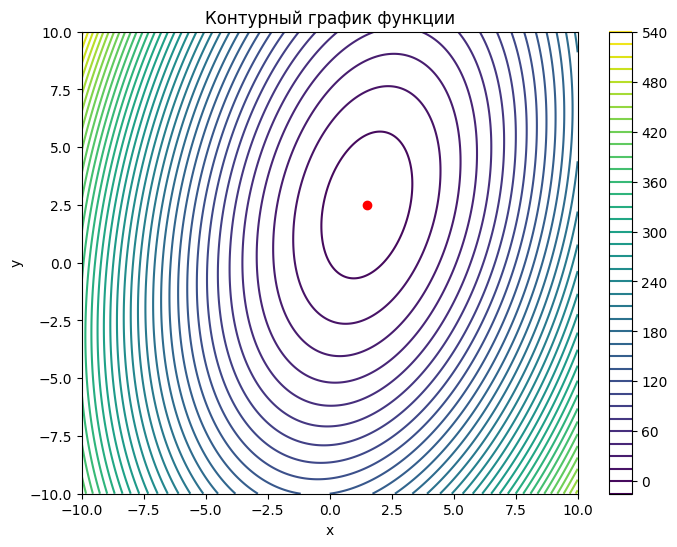

In [407]:
plt.figure(figsize=(8, 6))
contour_plot = plt.contour(X, Y, Z, levels=50)
plt.title('Контурный график функции')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour_plot)
plt.plot(res['min'][0], res['min'][1], 'ro')
plt.show()